# Strategy #1 Always Red or Black 
Bidding color prob  18/37 

In [3]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def always_red(bankroll):  
    bankroll = 100
    pockets = ["Red"] * 18 + ["Black"] * 18 + ["Green"] 
    bankroll_history = []
    while bankroll > 0:
        roll = random.choice(pockets)
        if roll == "Red":
            bankroll += 1
        else:
            bankroll -= 1
        bankroll_history.append(bankroll)
    return bankroll_history

Text(0.5, 1.0, 'Bankroll Over Time - Color Betting')

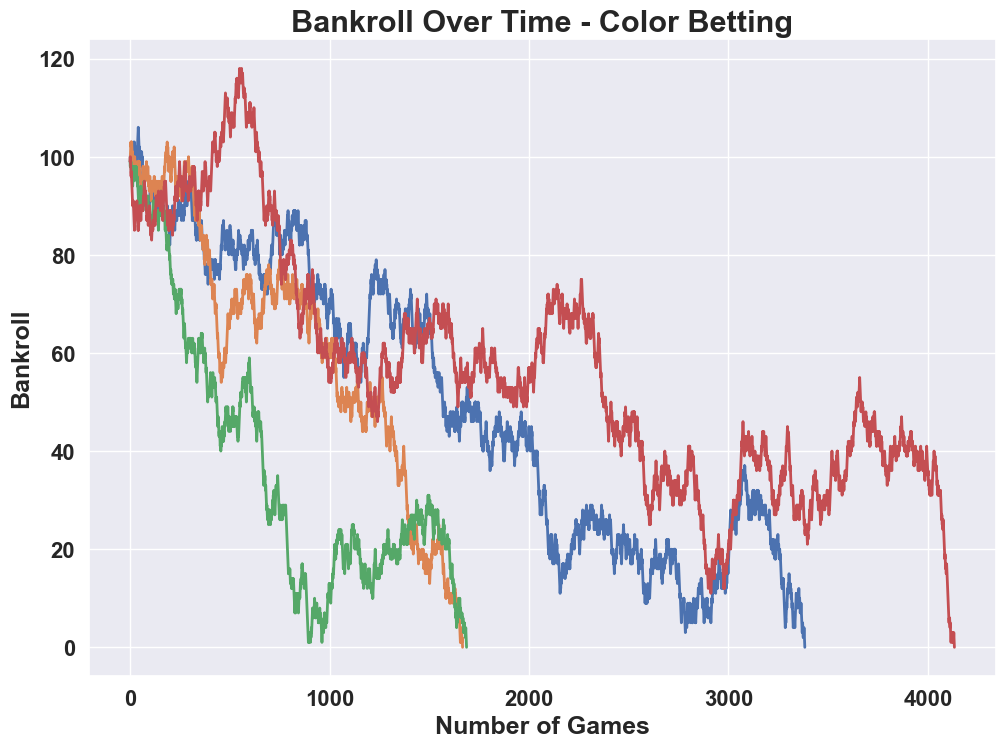

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in range(4):
    plt.plot(always_red(bankroll=100), linewidth=2)
    
plt.xlabel("Number of Games", fontsize=18, fontweight="bold")
plt.ylabel("Bankroll", fontsize=18, fontweight="bold")
plt.xticks(fontsize=16, fontweight="bold")
plt.yticks(fontsize=16, fontweight="bold")
plt.title("Bankroll Over Time - Color Betting", fontsize=22, fontweight="bold")

# Martingale Color

TypeError: Axis.set_ticks() missing 1 required positional argument: 'ticks'

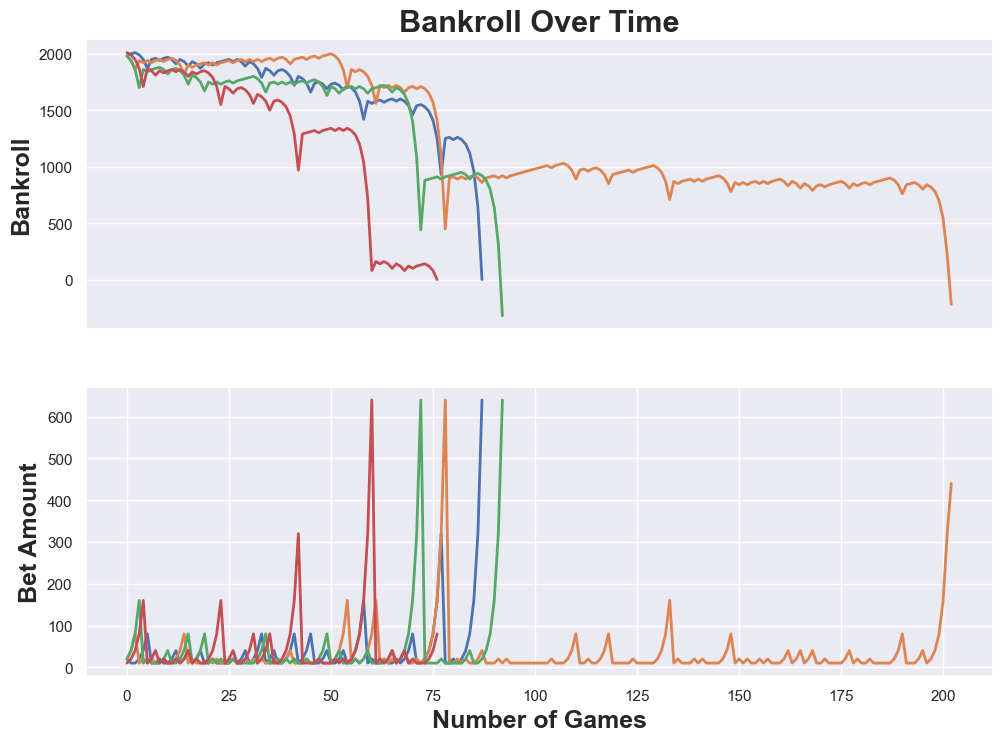

In [5]:
import random
import matplotlib.pyplot as plt

def martingale(bankroll):
    bet = 10
    cap = 1000  # Set the maximum betting cap
    pockets = ["Red"] * 18 + ["Black"] * 18 + ["Green"] 
    bankroll_history = []
    bet_history = []
    
    # Initialize the initial bankroll to track return percentage
    initial_bankroll = bankroll

    while bankroll > 0 and (bankroll - initial_bankroll) / initial_bankroll < 1:
        if bet > bankroll:
            bet = bankroll
        roll = random.choice(pockets)
        if roll == "Red":
            bankroll += bet
            bet = 10    
        else:
            if bet * 2 > cap:  # Check if doubling the bet exceeds the cap
                bet = cap - bet
            else:
                bet *= 2
            bankroll -= bet
        bankroll_history.append(bankroll)
        bet_history.append(bet)
    
    return bankroll_history, bet_history

# Set the figure size
plt.figure(figsize=(11.7, 8.27))

# Create subplots
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# Set initial bankroll
bankroll = 2000

# Plot the bankroll evolution
for i in range(4):
    bankroll_history, bet_history = martingale(bankroll)
    ax1.plot(bankroll_history, linewidth=2)
    ax2.plot(bet_history, linewidth=2)
    
ax1.set_ylabel("Bankroll", fontsize=18, fontweight="bold")
ax1.set_xticks([])
ax1.set_title("Bankroll Over Time", fontsize=22, fontweight="bold")

ax2.set_xlabel("Number of Games", fontsize=18, fontweight="bold")
ax2.set_ylabel("Bet Amount", fontsize=18, fontweight="bold")
ax2.set_xticks(fontsize=16, fontweight="bold")
ax2.set_yticks(fontsize=16, fontweight="bold")
ax2.set_title("Bet Amount Over Time", fontsize=22, fontweight="bold")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Double when 2 win or 2 lose 

In [6]:
# make table 
def bet_history_table(strategy, bankroll):

    # Initialize statistics lists
    num_games_played = []
    max_bankrolls = []
    min_bankrolls = []
    final_bankrolls = []

    # Number of Stimulation 
    times = 1

    for i in range(times):
        bankroll_history, bet_history, outcome_history, color_history,  consecutive_wins, consecutive_losses= strategy(bankroll)
        # Statistic 
        # num_games_played.append(len(bankroll_history))
        # max_bankrolls.append(max(bankroll_history))
        # min_bankrolls.append(min(bankroll_history))
        # final_bankrolls.append(bankroll_history[-1])

    from tabulate import tabulate
    # Combine the histories into a list of tuples
    data = list(zip(bankroll_history, bet_history, outcome_history, color_history, consecutive_wins, consecutive_losses))

    # Create headers for the table
    headers = ["Bankroll", "Bet Amount", "Outcome", "Color History", "consecutive_wins", "consecutive_losses"]

    # Create the table using tabulate
    table = tabulate(data, headers=headers, tablefmt="grid")

    print(table)


In [56]:
import random
import matplotlib.pyplot as plt

def martingale(bankroll):
    minimum_bet = 3
    bet = minimum_bet
    cap = 1000  # Set the maximum betting cap
    pockets = ["Red"] * 18 + ["Black"] * 18 + ["Green 0"] 
    bankroll_history = []
    bet_history = []
    outcome_history = []
    color_history = []
    consecutive_wins_list = []
    consecutive_losses_list = []
    consecutive_wins = 0
    consecutive_losses = 0

    max_bet_reached = False
    
    # Initialize the initial bankroll to track return percentage
    initial_bankroll = bankroll
    
    while bankroll > 0 and (bankroll - initial_bankroll) / initial_bankroll < 1:
        roll = random.choice(pockets)
        color_history.append(roll)

        if bet > bankroll or bet < minimum_bet or len(bet_history) >= 50:
            break  # Stop the program if the next bet would be over the bankroll or smaller the bankroll
        
        if len(bet_history) >= 2:
            if consecutive_losses < 3 and consecutive_wins < 3:
                bet = minimum_bet
            if consecutive_wins == 2 or consecutive_losses == 2:
                bet = bet_history[-1] * 2
            elif (consecutive_wins > 2 and consecutive_wins % 2 == 1) or (consecutive_losses > 2 and consecutive_losses % 2 == 1):
                bet = bet_history[-1]

        if roll == "Red": 
            bankroll += bet
            outcome_history.append("Win")
            consecutive_wins += 1
            consecutive_losses = 0
        else:
            outcome_history.append("Loss")
            bankroll -= bet
            consecutive_losses += 1
            consecutive_wins = 0
        
        consecutive_losses_list.append(consecutive_losses)
        consecutive_wins_list.append(consecutive_wins)
        bet_history.append(bet)
        bankroll_history.append(bankroll)
    
    return bankroll_history, bet_history, outcome_history, color_history, consecutive_wins_list, consecutive_losses_list


In [57]:
bet_history_table(martingale, 1000)

+------------+--------------+-----------+-----------------+--------------------+----------------------+
|   Bankroll |   Bet Amount | Outcome   | Color History   |   consecutive_wins |   consecutive_losses |
+============+==============+===========+=================+====================+======================+
|       1003 |            3 | Win       | Red             |                  1 |                    0 |
+------------+--------------+-----------+-----------------+--------------------+----------------------+
|       1000 |            3 | Loss      | Black           |                  0 |                    1 |
+------------+--------------+-----------+-----------------+--------------------+----------------------+
|       1003 |            3 | Win       | Red             |                  1 |                    0 |
+------------+--------------+-----------+-----------------+--------------------+----------------------+
|       1006 |            3 | Win       | Red             |     

In [ ]:
import random
import matplotlib.pyplot as plt

def martingale(bankroll):
    bet = 10
    minimum_bet = 10
    cap = 1000  # Set the maximum betting cap
    pockets = ["Red"] * 18 + ["Black"] * 18 + ["Green 0"] 
    bankroll_history = []
    bet_history = []
    outcome_history = []
    color_history = []
    consecutive_W_L_list = []

    max_bet_reached = False
    
    # Initialize the initial bankroll to track return percentage
    initial_bankroll = bankroll
    
    # Initialize counters for consecutive wins and losses
    consecutive_number = 0

    while bankroll > 0 and (bankroll - initial_bankroll) / initial_bankroll < 1:
        roll = random.choice(pockets)
        color_history.append(roll)
        
        if bet > bankroll or bet < minimum_bet:
            break # Stop the program if the next bet would be over the bankroll or smaller the bankroll
        
        if roll == "Red":
            bankroll += bet
            consecutive_number += 1
            outcome_history.append("Win")
            consecutive_W_L_list.append(consecutive_number)

            if consecutive_number % 2 == 0:
                bet *= 2
        
        else:
            outcome_history.append("Loss")
            if consecutive_number > 0:
                consecutive_number = -1
        
            if consecutive_wins >= 2 or consecutive_losses >= 2:
                bet *= 2
                if bet > cap:
                    max_bet_reached = True
                    break  # Stop the program if the next bet would be over the cap 
            else:
                if bet * 2 > cap:  # Check if doubling the bet exceeds the cap
                    max_bet_reached = True       
                    break  # Stop the program if the next bet would be over the cap
                else:
                    bet = minimum_bet
                
                bankroll -= bet


        consecutive_losses_list.append(consecutive_losses)
        consecutive_wins_list.append(consecutive_wins)
                   
        bankroll_history.append(bankroll)
        bet_history.append(bet)
    
    return bankroll_history, bet_history, outcome_history, color_history, consecutive_losses_list, consecutive_wins_list


+------------+--------------+-----------+-----------------+
|   Bankroll |   Bet Amount | Outcome   | Color History   |
+============+==============+===========+=================+
|       1003 |            3 | Win       | Red             |
+------------+--------------+-----------+-----------------+
|       1006 |            3 | Win       | Red             |
+------------+--------------+-----------+-----------------+
|       1003 |            3 | Loss      | Black           |
+------------+--------------+-----------+-----------------+
|       1006 |            3 | Win       | Red             |
+------------+--------------+-----------+-----------------+
|       1009 |            3 | Win       | Red             |
+------------+--------------+-----------+-----------------+
|       1012 |            3 | Win       | Red             |
+------------+--------------+-----------+-----------------+
|       1018 |            6 | Win       | Red             |
+------------+--------------+-----------

Statistics:
Number of games played: [1104]
Maximum bankrolls: [1180]
Minimum bankrolls: [10]
Final bankrolls: [10]


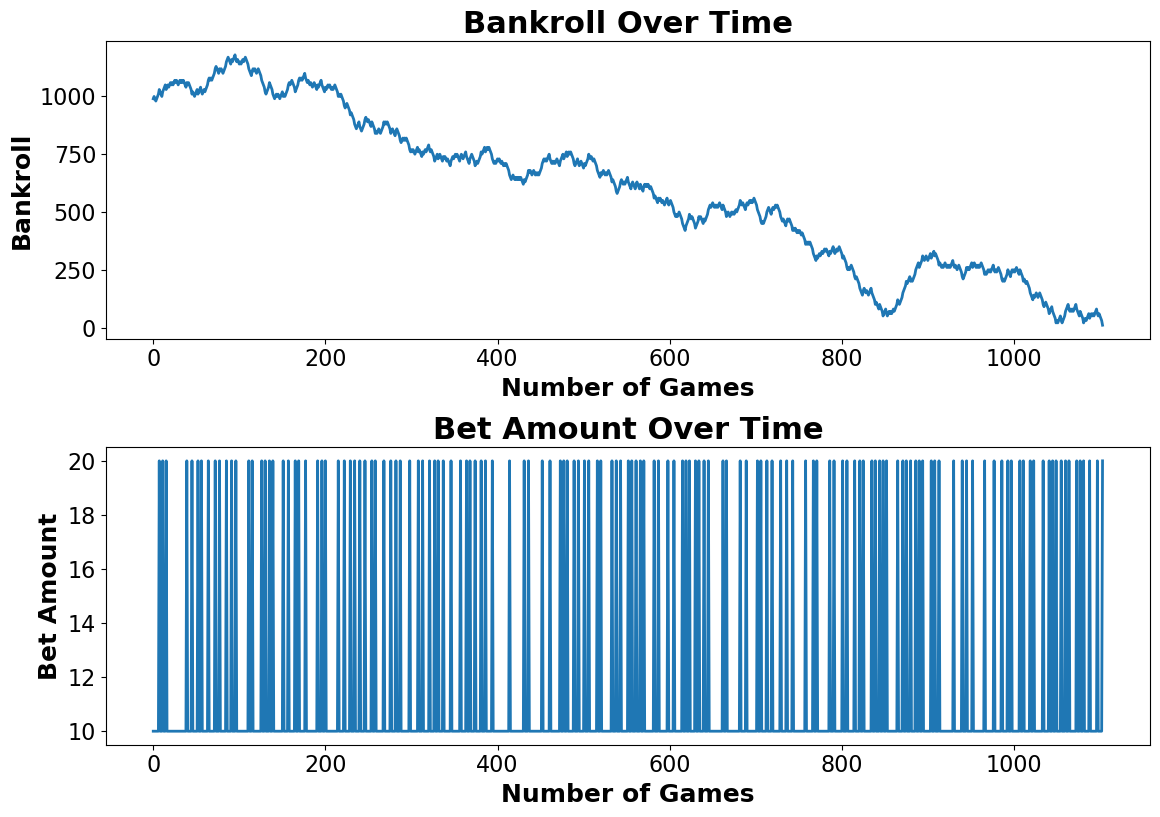

In [ ]:
# Plot the bankroll evolution

# Set the figure size
plt.figure(figsize=(11.7, 8.27))

# Create subplots
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# Display statistics
ax1.plot(bankroll_history, linewidth=2)
ax2.plot(bet_history, linewidth=2)
    
print("Statistics:")
print(f"Number of games played: {num_games_played}")
print(f"Maximum bankrolls: {max_bankrolls}")
print(f"Minimum bankrolls: {min_bankrolls}")
print(f"Final bankrolls: {final_bankrolls}")
    
# Set tick parameters for x and y axes
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

ax1.set_ylabel("Bankroll", fontsize=18, fontweight="bold")
ax1.set_xlabel("Number of Games", fontsize=18, fontweight="bold")
ax1.set_title("Bankroll Over Time", fontsize=22, fontweight="bold")

ax2.set_xlabel("Number of Games", fontsize=18, fontweight="bold")
ax2.set_ylabel("Bet Amount", fontsize=18, fontweight="bold")
ax2.set_title("Bet Amount Over Time", fontsize=22, fontweight="bold")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# title_df = ['bankroll_history', 'bet_history']
# merge = [bankroll_history, bet_history]
# df = pd.DataFrame(np.reshape(merge, (-1,2), order='F'), columns=title_df)
# print (df)
bankroll_history[0], bet_history[0], outcome_history[0]